# Visualizaition Basic 1 

## 1. 環境設定 

In [1]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import qgrid

#pandas初期設定
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# 自作モジュールのインポート
sys.path.append('/home/ryo/KDD/000Python/mylibrary')
imporhttp://localhost:8888/notebooks/02pgm/Viz_Basic_1.ipynb#2.-%E3%83%87%E3%83%BC%E3%82%BF%E8%AA%AD%E8%BE%BC%E3%81%BFt basic_analytics as ba

# dataディレクトリ
data_dir = "/home/ryo/Compe/000Kaggle/2017/Zillow/10Data/00RawData/"

# outputディレクトリ
out_dir = "/home/ryo/Compe/000Kaggle/2017/Zillow/01output"

# 出力をggplot風にする
plt.style.use('ggplot')
%matplotlib inline

height has been deprecated.



## 2. データ読込み 

In [2]:
# データディレクトリに移動
os.chdir(data_dir)

# train_2016
train16_1 = pd.read_csv( 'train_2016.csv')

# properties_2016
prop16_1 = pd.read_csv('properties_2016.csv')

/home/ryo/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## 3. Data Viz 

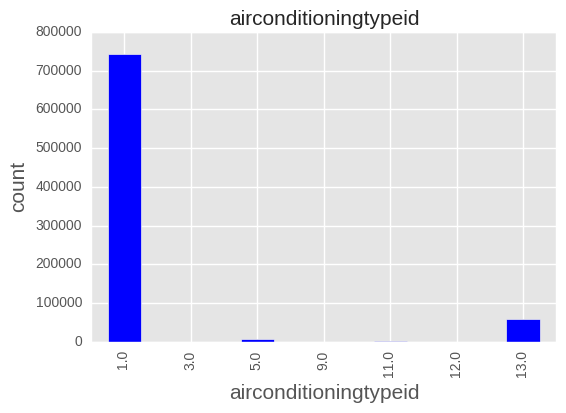

In [3]:
# 棒グラフ
prop16_1['airconditioningtypeid'].value_counts(sort=False).plot(kind='bar', color='b')
# Title
plt.title("airconditioningtypeid", fontsize=15) 
plt.xlabel("airconditioningtypeid", fontsize=15)
plt.ylabel("count", fontsize=15)

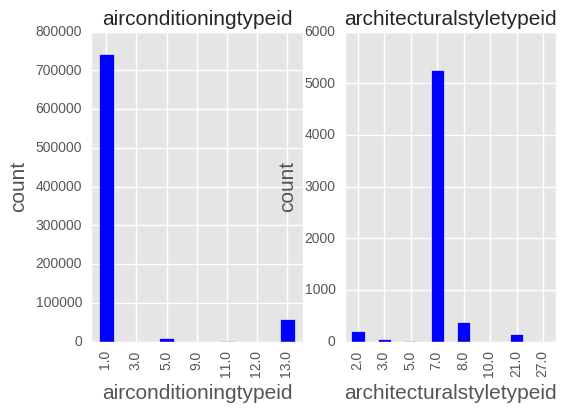

In [4]:
# 棒グラフ✗2
# fig1
plt.subplot(1, 2, 1)
prop16_1['airconditioningtypeid'].value_counts(sort=False).plot(kind='bar', color='b')
# Title
plt.title("airconditioningtypeid", fontsize=15) 
plt.xlabel("airconditioningtypeid", fontsize=15)
plt.ylabel("count", fontsize=15)
# fig2
plt.subplot(1, 2, 2)
prop16_1['architecturalstyletypeid'].value_counts(sort=False).plot(kind='bar', color='b')
# Title
plt.title("architecturalstyletypeid", fontsize=15) 
plt.xlabel("architecturalstyletypeid", fontsize=15)
plt.ylabel("count", fontsize=15)
plt.show()

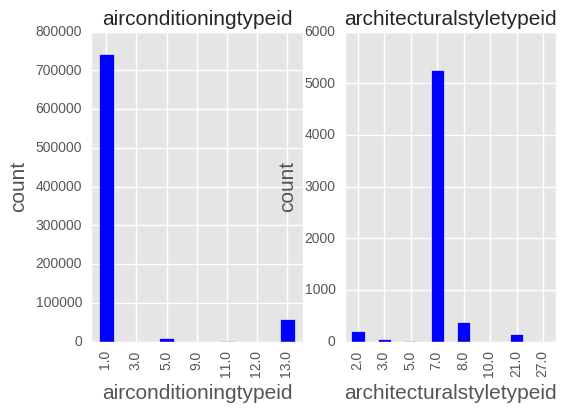

In [5]:
# 棒グラフ✗2 subplotは1桁なら短くかける - subplot(121) のように
# fig1
plt.subplot(121)
prop16_1['airconditioningtypeid'].value_counts(sort=False).plot(kind='bar', color='b')
# Title
plt.title("airconditioningtypeid", fontsize=15) 
plt.xlabel("airconditioningtypeid", fontsize=15)
plt.ylabel("count", fontsize=15)
# fig2
plt.subplot(122)
prop16_1['architecturalstyletypeid'].value_counts(sort=False).plot(kind='bar', color='b')
# Title
plt.title("architecturalstyletypeid", fontsize=15) 
plt.xlabel("architecturalstyletypeid", fontsize=15)
plt.ylabel("count", fontsize=15)
plt.show()

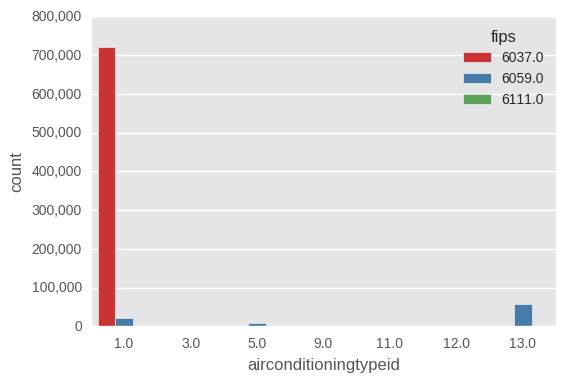

In [27]:
import matplotlib
ax = sns.countplot(x='airconditioningtypeid', data=prop16_1, hue='fips', palette='Set1')
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda y, p: format(int(y), ',')))

In [7]:
# matplotlibで上のグラフを出力してみる
cnt = prop16_1.groupby(['airconditioningtypeid','fips']).count()

### Facet Grid

属性ごとに一気にグラフ化を行う手法は『Facet』と呼ばれます。

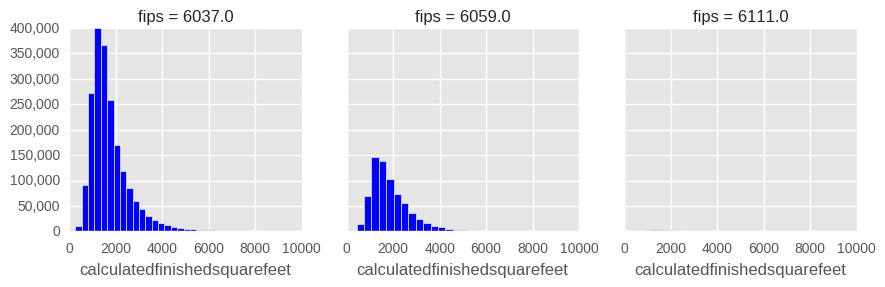

In [29]:
import matplotlib.ticker as tkr
g = sns.FacetGrid(prop16_1, col='fips')
g = g.map(plt.hist, "calculatedfinishedsquarefeet", bins=3000, color="Blue").set(xlim=(0,10000))

# 千位にカンマをつける
for ax in g.axes[0]:
    ax.yaxis.set_major_formatter(
        tkr.FuncFormatter(lambda y, p: "{:,}".format(int(y))))